<a class="anchor" id="0"></a>

# **ARIMA Model for Time Series Forecasting**



In this tutorial, I will discuss **ARIMA Model for time series forecasting**. ARIMA model is used to forecast a time series using the series past values. 

So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction to Time Series Forecasting](#1)
2.	[Introduction to ARIMA Models](#2)
3.	[The meaning of p, d and q in ARIMA model](#3)
4.	[AR and MA models](#4)
5.	[How to find the order of differencing (d) in ARIMA model](#5)
6.  [Installing Statsforecast](#6)
7.  [Loading libraries and data](#7)
8.  [Explore Data with the plot method](#8)
9.	[How to find the order of the AR term (p)](#9)
10.	[How to find the order of the MA term (q)](#10)
11.	[How to handle if a time series is slightly under or over differenced](#11)
12.	[How to build the ARIMA Model](#12)
13.	[Accuracy Metrics for Time Series Forecast](#13)
14. [References](#14)



## **1. Introduction to Time Series Forecasting** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


- A **Time Series** is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

- Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

- We have discussed various aspects of **Time Series Forecasting** in the previous notebook.

- Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

#### **Forecasting a time series can be broadly divided into two types.**

- If we use only the previous values of the time series to predict its future values, it is called **Univariate Time Series Forecasting.**

- If we use predictors other than the series (like exogenous variables) to forecast it is called **Multi Variate Time Series Forecasting.**

- This notebook focuses on a particular type of forecasting method called **ARIMA modeling.**



## **2. Introduction to ARIMA Models** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- **ARIMA** stands for **Autoregressive Integrated Moving Average Model**. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.


- So, **ARIMA**, short for **AutoRegressive Integrated Moving Average**, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.


- **ARIMA Models** are specified by three order parameters: (p, d, q), 

   where,

   - p is the order of the AR term

   - q is the order of the MA term

   - d is the number of differencing required to make the time series stationary


- **AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.


- **I(d) Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.


- **MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.




### **2.1 Types of ARIMA Model**


- **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
- **SARIMA** : Seasonal ARIMA
- **SARIMAX** : Seasonal ARIMA with exogenous variables



If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for **Seasonal ARIMA**.

## **3. The meaning of p, d and q in ARIMA model** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


### **3.1 The meaning of p**


- `p` is the order of the **Auto Regressive (AR)** term. It refers to the number of lags of Y to be used as predictors.



### **3.2 The meaning of d**


- The term **Auto Regressive**’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.


- The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.


- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.



### **3.3 The meaning of q**


- **q** is the order of the **Moving Average (MA)** term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

## **4. AR and MA models** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



### **4.1 AR model**

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus, an autoregressive model of order p can be written as

$$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}, \tag{1}$$



where $\epsilon_t$ is white noise. This is like a multiple regression but with lagged values of  $y_t$ as predictors. We refer to this as an AR( p) model, an autoregressive model of order p
 .




### **4.2 MA model**
Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model,

$$y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q}, \tag{2}$$

where  $\epsilon_t$ is white noise. We refer to this as an MA(q) model, a moving average model of order q. Of course, we do not observe the values of  
$\epsilon_t$ , so it is not really a regression in the usual sense.

Notice that each value of  yt can be thought of as a weighted moving average of the past few forecast errors (although the coefficients will not normally sum to one). However, moving average models should not be confused with the moving average smoothing . A moving average model is used for forecasting future values, while moving average smoothing is used for estimating the trend-cycle of past values.


Thus, we have discussed AR and MA Models respectively.

## **4.3 ARIMA model**

If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average (in this context, “integration” is the reverse of differencing). The full model can be written as

\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t},   \tag{3}
\end{equation}


where $y'_{t}$ is the differenced series (it may have been differenced more than once). The “predictors” on the right hand side include both lagged values of $y_t$ and lagged errors. We call this an ARIMA(p,d,q) model, where

|  |  |
|-|-------------------------|
|p|order of the autoregressive part|
|d|degree of first differencing involved|
|q|order of the moving average part|

The same stationarity and invertibility conditions that are used for autoregressive and moving average models also apply to an ARIMA model.

Many of the models we have already discussed are special cases of the ARIMA model, as shown in Table

|Model          |p   d   q |Differenced         |Method|
|---------------|----------|---------------------|--------------|
|Arima(0,0,0)   |0   0   0 |$y_t=Y_t$            |White noise|
|ARIMA (0,1,0)  |0   1   0 |$y_t = Y_t - Y_{t-1}$| Random walk|
|ARIMA (0,2,0)  |0   2   0 |$y_t = Y_t - 2Y_{t-1} + Y_{t-2}$| Constant|
|ARIMA (1,0,0)  |1   0   0 |$\hat Y_t = \mu + \Phi_1 Y_{t-1} + \epsilon $| AR(1): AR(1): First-order regression model|
|ARIMA (2, 0, 0)|2   0   0 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \epsilon$| AR(2): Second-order regression model|
|ARIMA (1, 1, 0)|1   1   0 |$\hat Y_t = \mu + Y_{t-1} + \Phi_1 (Y_{t-1}- Y_{t-2})$ | Differenced first-order
autoregressive model|
|ARIMA (0, 1, 1)|0   1   1 |$\hat Y_t = Y_{t-1} - \Phi_1 e^{t-1}$|Simple exponential
smoothing|
|ARIMA (0, 0, 1)|0   0   1 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1}$|MA(1): First-order
regression model|
ARIMA (0, 0, 2) |0   0   2 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1} – \omega_2 \epsilon_{t-2}$|MA(2): Second-order
regression model|
|ARIMA (1, 0, 1)|1   0   1 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1}+ \epsilon_t – \omega_1 \epsilon_{t-1}$|ARMA model|
|ARIMA (1, 1, 1)|1   1   1 |$\Delta Y_t = \Phi_1 Y_{t-1} + \epsilon_t - \omega_1 \epsilon_{t-1}$ |ARIMA model|
|ARIMA (1, 1, 2)|1   1   2 |$\hat Y_t = Y_{t-1} + \Phi_1 (Y_{t-1} - Y_{t-2} )- \Theta_1 e_{t-1} - \Theta_1 e_{t-1}$ Damped-trend linear Exponential smoothing|
|ARIMA (0, 2, 1) OR (0,2,2) |0 2 1 |$\hat Y_t = 2 Y_{t-1} - Y_{t-2} - \Theta_1 e_{t-1} - \Theta_2 e_{t-2}$|Linear exponential smoothing|



Once we start combining components in this way to form more complicated models, it is much easier to work with the backshift notation. For example, the above equation can be written in backshift notation as

\begin{equation}
\tag{4}
  \begin{array}{c c c c}
    (1-\phi_1B - \cdots - \phi_p B^p) & (1-B)^d y_{t} &= &c + (1 + \theta_1 B + \cdots + \theta_q B^q)\varepsilon_t\\
    {\uparrow} & {\uparrow} & &{\uparrow}\\
    \text{AR($p$)} & \text{$d$ differences} & & \text{MA($q$)}\\
  \end{array}
\end{equation}

### **ARIMA model in words**:


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)



## **5. How to find the order of differencing (d) in ARIMA model**  <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.


- So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.


- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.


- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.


- Now, we will explain these concepts with the help of an example as follows:-



# **6. Installing Statsforecast** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

* using pip:

`pip install statsforecast`

* using with conda:

`conda install -c conda-forge statsforecast`

- First, I will check if the series is stationary using the **Augmented Dickey Fuller test (ADF Test)**, from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.


- The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.


- So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **7. Loading libraries and data** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

## **Libraries**

In [4]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# Metrics for model
# ==============================================================================
from sklearn import metrics

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

## **Import data**

Let's pull the S&P500 stock data from the Yahoo Finance site.

In [5]:
ticker = '^GSPC'
period1 = int(time.mktime(datetime(2015, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.now().timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

SP_500 = pd.read_csv(query_string)
SP_500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [17]:
Y=SP_500[["Date","Close"]]

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [18]:
Y["unique_id"]="1"
Y.columns=["ds", "y", "unique_id"]
Y.head()

,ds,y,unique_id
0,2015-01-02,2058.199951,1
1,2015-01-05,2020.579956,1
2,2015-01-06,2002.609985,1
3,2015-01-07,2025.900024,1
4,2015-01-08,2062.139893,1


Now, let's now check the last few rows of our time series using the `.tail()` function.

In [19]:
Y.tail()

,ds,y,unique_id
2177,2023-08-28,4433.310059,1
2178,2023-08-29,4497.629883,1
2179,2023-08-30,4514.870117,1
2180,2023-08-31,4507.660156,1
2181,2023-09-01,4515.770020,1


In [20]:
X=SP_500[["Date","Open","High"]]


In [21]:
X["unique_id"]="1"
X.columns=["ds", "Open","High", "unique_id"]
X.head()

,ds,Open,High,unique_id
0,2015-01-02,2058.899902,2072.360107,1
1,2015-01-05,2054.439941,2054.439941,1
2,2015-01-06,2022.150024,2030.250000,1
3,2015-01-07,2005.550049,2029.609985,1
4,2015-01-08,2030.609985,2064.080078,1


In [40]:
train = Y.merge(X, how = 'left', on = ['unique_id', 'ds']) 
train.head()

,ds,y,unique_id,Open,High
0,2015-01-02,2058.199951,1,2058.899902,2072.360107
1,2015-01-05,2020.579956,1,2054.439941,2054.439941
2,2015-01-06,2002.609985,1,2022.150024,2030.250000
3,2015-01-07,2025.900024,1,2005.550049,2029.609985
4,2015-01-08,2062.139893,1,2030.609985,2064.080078


# **8. Explore Data with the plot method** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2182 non-null   datetime64[ns]
 1   Open       2182 non-null   float64       
 2   High       2182 non-null   float64       
 3   unique_id  2182 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 68.3+ KB


We can see that our time variable (ds) is in an object format, we need to convert to a date format

In [26]:
# Convert to a datetime format
from datetime import datetime
Y["ds"] = pd.to_datetime(Y["ds"])
X["ds"] = pd.to_datetime(X["ds"])

### **8.1 Checking Stationarity**

In [30]:
from statsforecast import StatsForecast

StatsForecast.plot(Y)

Looking at the plot we can observe there is an upward trend over the period of time.

count    2182.000000
mean     3075.682809
std       847.472498
min      1829.079956
25%      2348.509949
50%      2863.174927
75%      3909.187500
max      4796.560059
Name: y, dtype: float64

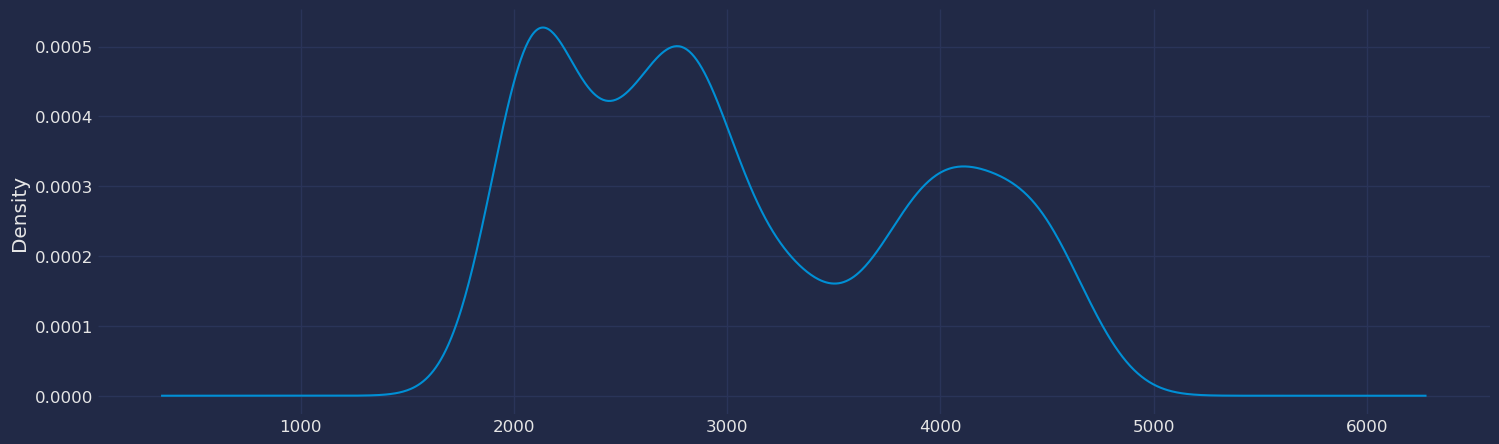

In [32]:
Y["y"].plot(kind='kde',figsize = (16,5))
Y["y"].describe()

### **8.2 Seasonal Decomposed**

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* multiplicative

### Additive time series

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

### Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose 

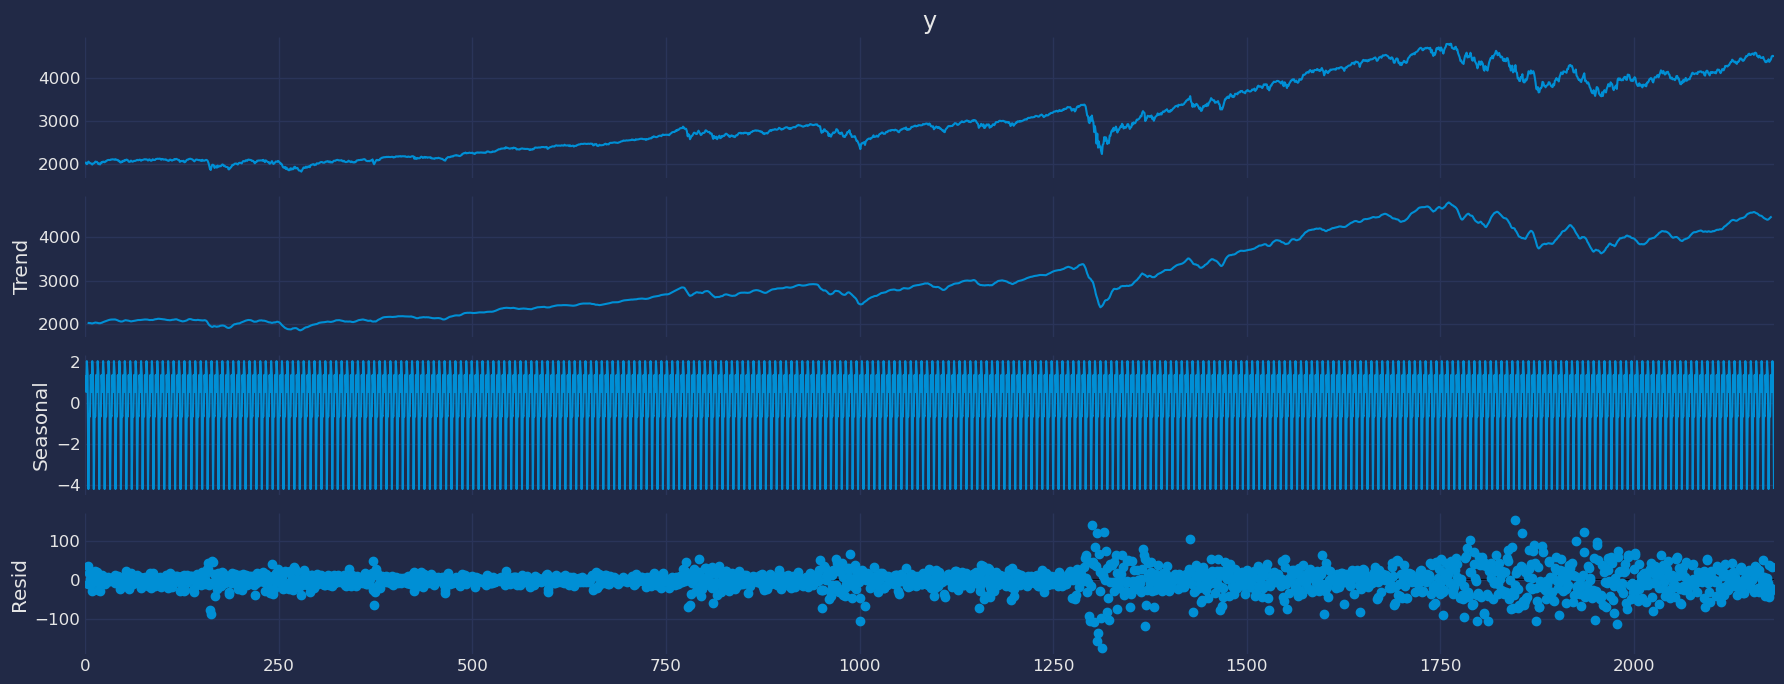

In [36]:
decomposed=seasonal_decompose(Y["y"], model = "add", period=7)
decomposed.plot()
plt.show()

### The Augmented Dickey-Fuller Test
An Augmented Dickey-Fuller (ADF) test is a type of statistical test that determines whether a unit root is present in time series data. Unit roots can cause unpredictable results in time series analysis. A null hypothesis is formed in the unit root test to determine how strongly time series data is affected by a trend. By accepting the null hypothesis, we accept the evidence that the time series data is not stationary. By rejecting the null hypothesis or accepting the alternative hypothesis, we accept the evidence that the time series data is generated by a stationary process. This process is also known as stationary trend. The values of the ADF test statistic are negative. Lower ADF values indicate a stronger rejection of the null hypothesis.

Augmented Dickey-Fuller Test is a common statistical test used to test whether a given time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

Null Hypothesis: Time Series is non-stationary. It gives a time-dependent trend.
Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

ADF or t Statistic < critical values: Reject the null hypothesis, time series is stationary.
ADF or t Statistic > critical values: Failed to reject the null hypothesis, time series is non-stationary.

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [39]:
Augmented_Dickey_Fuller_Test_func(Y["y"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                   -0.581985
p-value                           0.875001
No Lags Used                     10.000000
Number of observations used    2171.000000
Critical Value (1%)              -3.433366
Critical Value (5%)              -2.862872
Critical Value (10%)             -2.567479
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


We can see in the result that we obtained the non-stationary series, because the p-value is greater than 5%.

One of the objectives of applying the ADF test is to know if our series is stationary, knowing the result of the ADF test, then we can determine the next step. For our case, it can be seen from the previous result that the time series is not stationary, so we will proceed to the next step, which is to differentiate our time series.

We are going to create a copy of our data, with the objective of investigating to find the stationarity in our time series.

Once we have made the copy of the time series, we are going to differentiate the time series, and then we will use the augmented Dickey Fuller test to investigate if our time series is stationary.

In [21]:
df1=df.copy()
# Take first difference

df1['y_diff'] = df['y'].diff()

# removing null data
df1.dropna(inplace=True)

# 
df1.head()

,ds,y,unique_id,y_diff
1,1961-01-01,69.760244,1,0.636341
2,1962-01-01,69.149756,1,-0.610488
3,1963-01-01,69.248049,1,0.098293
4,1964-01-01,70.311707,1,1.063659
5,1965-01-01,70.171707,1,-0.140000


Let's apply the Dickey Fuller test again to find out if our time series is already stationary.

In [22]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                -8.510100e+00
p-value                        1.173776e-13
No Lags Used                   1.000000e+00
Number of observations used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


We can observe in the previous result that now if our time series is stationary, the p-value is less than 5%.

Now our time series is stationary, that is, we have only differentiated 1 time, therefore, the order of our parameter $d=1$.

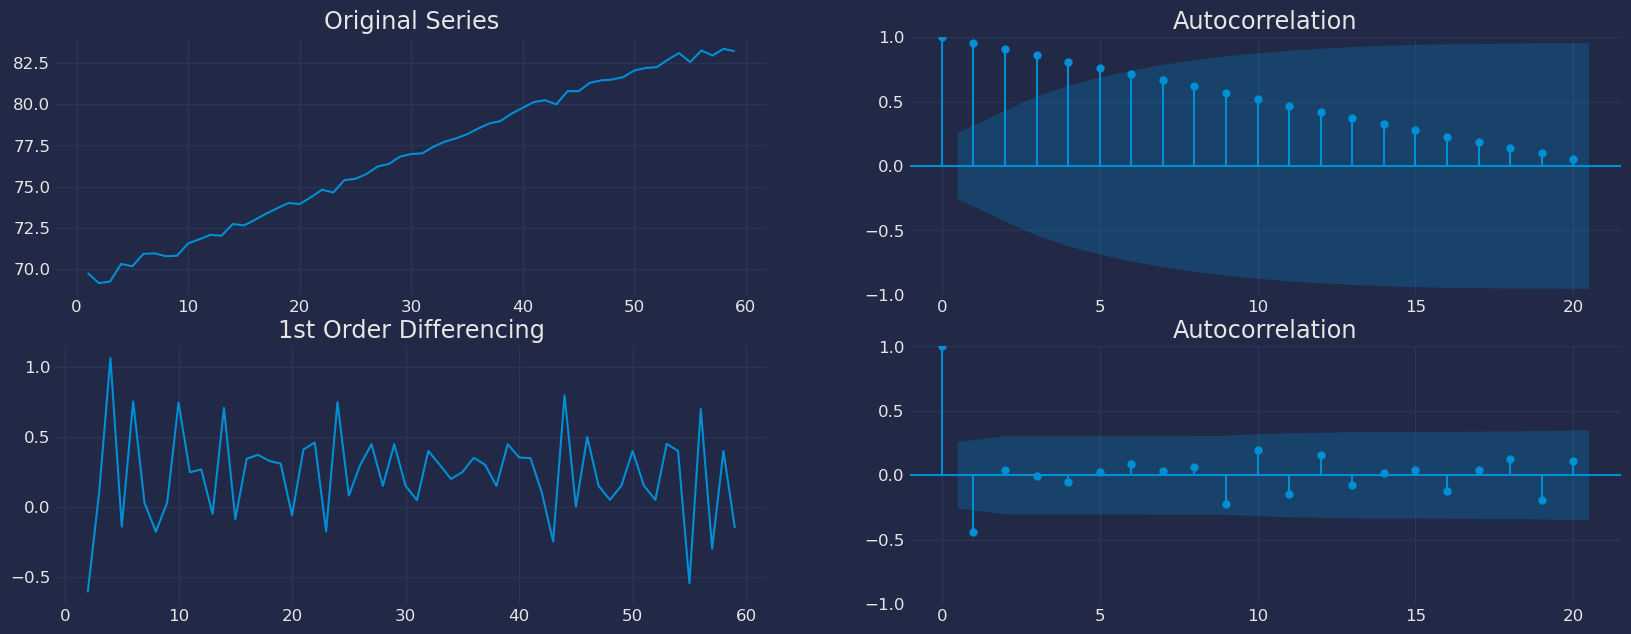

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Original Series
fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

# 1st Differencing
axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()

- For the above data, we can see that the time series reaches stationarity with one orders of differencing.



# **9. How to find the order of the AR term (p)** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


- The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the **Partial Autocorrelation (PACF) plot**.


- **Partial autocorrelation** can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.


- Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of $Y$.


$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- That is, suppose, if $Y_t$ is the current series and $Y_{t-1}$ is the lag 1 of $Y$, then the partial autocorrelation of lag 3 $(Y_{t-3})$ is the coefficient $\alpha_3$ of $Y_{t-3}$ in the above equation.


- Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.



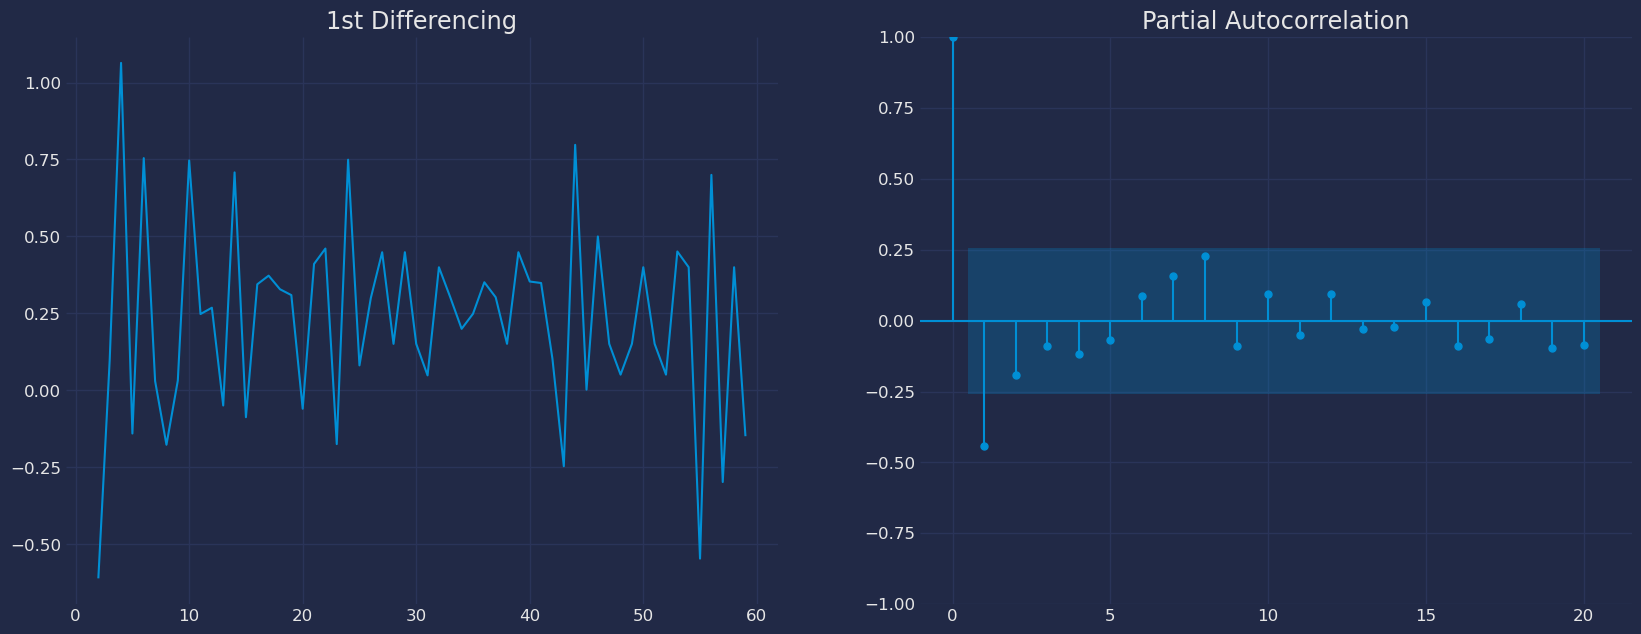

In [24]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()

- We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

# **10. How to find the order of the MA term (q)** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)


- Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.


- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.


- Let’s see the autocorrelation plot of the differenced series.

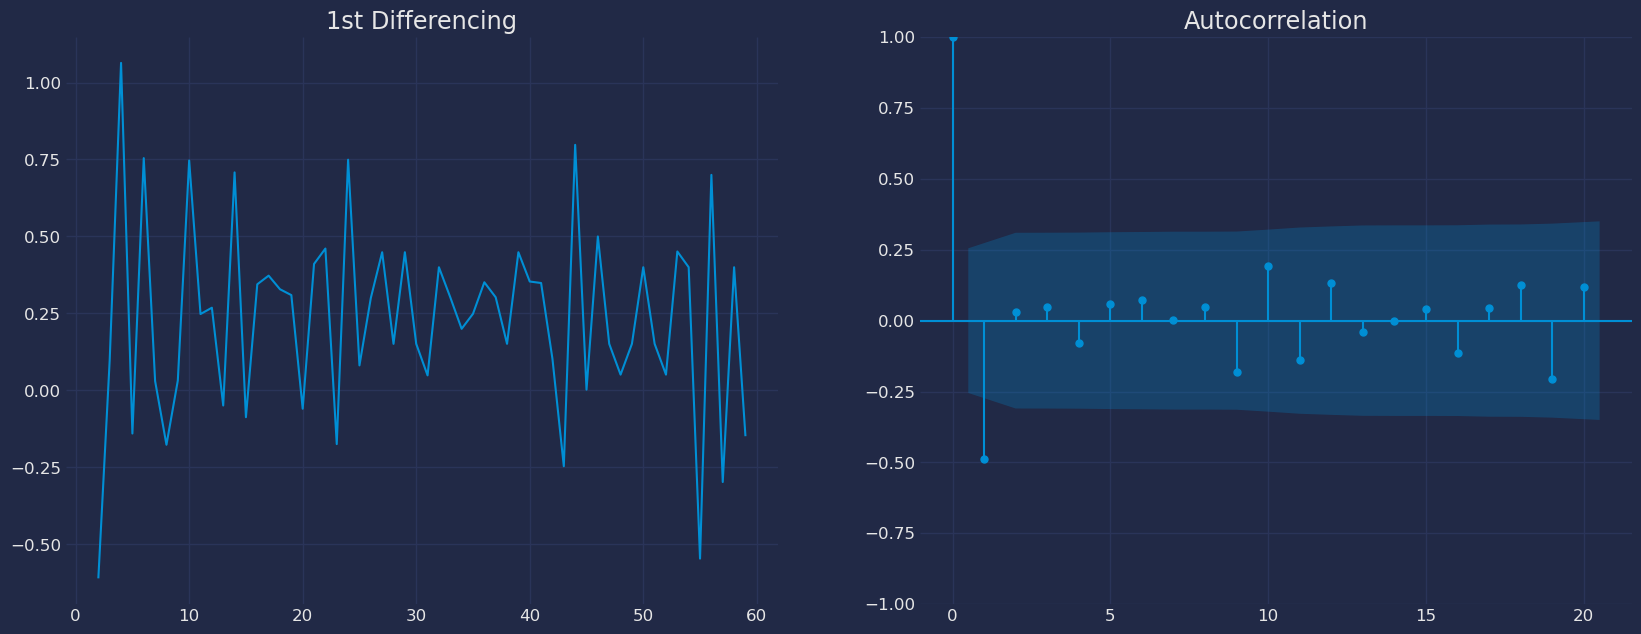

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()

- We can see that couple of lags are well above the significance line. So, we will fix q as 1. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

## **11. How to handle if a time series is slightly under or over differenced** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)


- It may happen that the time series is slightly under differenced. Differencing it one more time makes it slightly over-differenced. 


- If the series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, we will try adding an additional MA term.

## **12. How to build the ARIMA Model** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)


Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the `statsforecast` package.

The parameters found are:
* For the autoregressive model, $p=1$
* for the moving average model $q=1$
* and for the stationarity of the model with a differential with an order $d=1$

Therefore, the model that we are going to test is the ARIMA(1,1,1) model.

In [41]:
from statsforecast.models import ARIMA

If we want to know the parameters that the ARIMA function has, we can extract it with the following instruction `?ARIMA`.

https://nixtla.github.io/statsforecast/src/core/models.html#arima-family

In [21]:
?ARIMA

Init signature:
ARIMA(
    order: Tuple[int, int, int] = (0, 0, 0),
    season_length: int = 1,
    seasonal_order: Tuple[int, int, int] = (0, 0, 0),
    include_mean: bool = True,
    include_drift: bool = False,
    include_constant: Optional[bool] = None,
    blambda: Optional[float] = None,
    biasadj: bool = False,
    method: str = 'CSS-ML',
    fixed: Optional[dict] = None,
    alias: str = 'ARIMA',
)
Docstring:     
ARIMA model.

AutoRegressive Integrated Moving Average model.

**References:**<br>
[Rob J. Hyndman, Yeasmin Khandakar (2008). "Automatic Time Series Forecasting: The forecast package for R"](https://www.jstatsoft.org/article/view/v027i03).

Parameters
----------
order : tuple (default=(0, 0, 0))
    A specification of the non-seasonal part of the ARIMA model: the three components (p, d, q) are the AR order, the degree of differencing, and the MA order.
season_length : int (default=1)
    Number of observations per unit of time. Ex: 24 Hourly data.
seasonal_order : 

### **12.1 Building the model**

In [43]:
# ARIMA Model
arima = ARIMA(order=(1, 1, 1), season_length=1)

To know more about the parameters that the function has, you can see it [here](https://nixtla.github.io/statsforecast/src/core/models.html#arima-family).

### **12.2 Fit the Model**

In [46]:
arima = arima.fit(y=Y, X=X)
arima

AttributeError: 'DataFrame' object has no attribute 'dtype'

### **12.3 making the predictions**

In [29]:
y_hat_dict = arima.predict(h=6,)
y_hat_dict

{'mean': array([83.20155301, 83.20016307, 83.20064702, 83.20047852, 83.20053719,
        83.20051676])}

We can make the predictions by adding the confidence interval, for example with 95%.

In [30]:
y_hat_dict2 = arima.predict(h=6,level=[95])
y_hat_dict2

{'mean': array([83.20155301, 83.20016307, 83.20064702, 83.20047852, 83.20053719,
        83.20051676]),
 'lo-95': 0    82.399545
 1    82.072363
 2    81.820183
 3    81.607471
 4    81.420010
 5    81.250474
 Name: 95%, dtype: float64,
 'hi-95': 0    84.003561
 1    84.327963
 2    84.581111
 3    84.793486
 4    84.981064
 5    85.150560
 Name: 95%, dtype: float64}

You can see that the result that has been extracted in the predictions or in any other method that we use from now on with the Arima model is a dictionary. To extract that result we can use the `.get()` function, which will help us to be able to extract the result of each part of the dictionary of each of the methods that we use.

### **12.4 ARIMA.forecast method**

Memory efficient predictions.

This method avoids memory burden due from object storage. It is analogous to fit_predict without storing information. It assumes you know the forecast horizon in advance.

In [31]:
Y_hat_df=arima.forecast(y=df["y"].values, h=6, fitted=True)
Y_hat_df

{'mean': array([83.20155301, 83.20016307, 83.20064702, 83.20047852, 83.20053719,
        83.20051676]),
 'fitted': array([69.05477857, 69.12394817, 69.75299437, 69.15912019, 69.24378043,
        70.30108758, 70.1768715 , 70.91580642, 70.95970624, 70.7809505 ,
        70.81126886, 71.55054441, 71.80679168, 72.07233443, 72.0279183 ,
        72.72583278, 72.65118662, 72.98674108, 73.36216447, 73.69027839,
        74.00014861, 73.94469901, 74.34873167, 74.8111531 , 74.64339332,
        75.37995777, 75.47302934, 75.76655702, 76.2158311 , 76.37025745,
        76.81458465, 76.97067731, 77.01897755, 77.41515795, 77.71998951,
        77.92034484, 78.16845267, 78.51873753, 78.82204435, 78.97468575,
        79.41961419, 79.77564854, 80.12368405, 80.2291665 , 79.9857536 ,
        80.77049462, 80.7862653 , 81.27613438, 81.43472012, 81.48459197,
        81.63513184, 82.03254064, 82.18745311, 82.23856226, 82.68528462,
        83.08738006, 82.55106033, 83.23355629, 82.95319957, 83.33949704])}

As the result of the predictions that we have generated is a dictionary, to make use of that result we are going to save it in `.DataFrame()`. First we are going to generate a range of dates, then we use the `.get()` function to extract the predictions and then we concatenate them and save them in a DataFrame.

In [32]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast


,ds
0,2014-01-01
1,2015-01-01
2,2016-01-01
3,2017-01-01
4,2018-01-01
5,2019-01-01


In [33]:
df=df.set_index("ds")

In [34]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast

,unique_id,hat,lo-95,hi-95
ds,,,,
2014-01-01,1,83.201553,82.399545,84.003561
2015-01-01,1,83.200163,82.072363,84.327963
2016-01-01,1,83.200647,81.820183,84.581111
2017-01-01,1,83.200479,81.607471,84.793486
2018-01-01,1,83.200537,81.420010,84.981064
2019-01-01,1,83.200517,81.250474,85.150560


Once the predictions have been generated we can perform a visualization to see the generated behavior of our model.

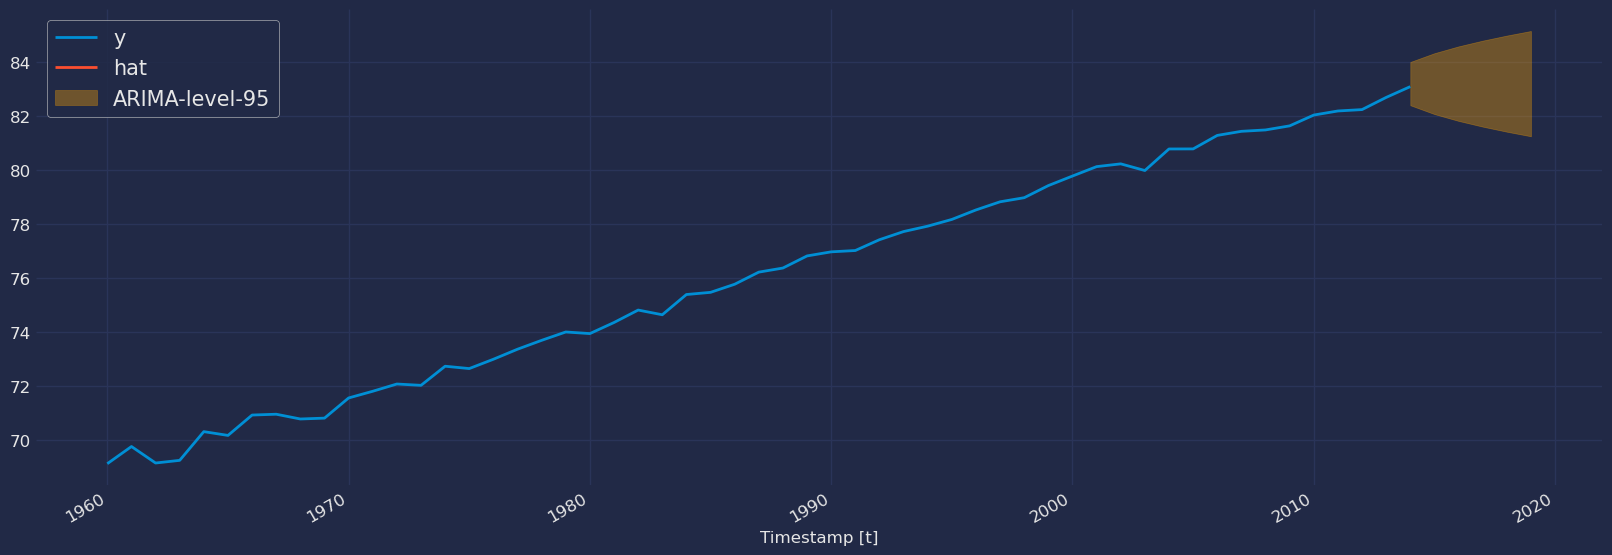

In [35]:
_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)

# **13. Accuracy Metrics for Time Series Forecast** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)


The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Correlation between the Actual and the Forecast (corr)



Typically, we will use three accuracy metrices:-

1. MAPE
2. Correlation 

can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.

In [36]:
df.reset_index("ds", inplace=True)
Y_train_df = df[df.ds<='2013-01-01'] 
Y_test_df = df[df.ds>'2013-01-01'] 

Y_train_df.shape, Y_test_df.shape

((54, 3), (6, 3))

In [37]:
def model_evaluation(y_true, y_pred, Model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {Model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')            
    

In [38]:
model_evaluation(Y_test_df["y"], forecast["hat"], "Arima")

Model Evaluation: Arima
MSE is : 0.0884653396233554
MAE is : 0.20228704680278517
RMSE is : 0.29743123511722064
MAPE is : 0.24430769701243657
R2 is : -0.27928591564425864
corr is : 0.36346163469207654



- Around 24.43% MAPE implies the model is about 75.57% accurate in predicting the next 6 observations. Now we know how to build an ARIMA model manually. 



# **14. References** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)



1. [Nixtla-Arima](https://nixtla.github.io/statsforecast/src/core/models.html#arima-family)

2. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html)


[Go to Top](#0)